In [4]:
print('Nama                 : Aldi Akbar Alimi')
print('Username dicoding    : alldinosaur')
print('Email                : aldiakbar373@gmail.com')
print('Domisili             : Kab. Cirebon')
print('TTL                  : Brebes, 25 Juni 2001')
print('Pendidikan Terakhir  : SMA Negeri 1 Brebes')
print('Pendidikan Sekarang  : STT Terpadu Nurul Fikri')

Nama                 : Aldi Akbar Alimi
Username dicoding    : alldinosaur
Email                : aldiakbar373@gmail.com
Domisili             : Kab. Cirebon
TTL                  : Brebes, 25 Juni 2001
Pendidikan Terakhir  : SMA Negeri 1 Brebes
Pendidikan Sekarang  : STT Terpadu Nurul Fikri


In [5]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv',encoding="latin1")
df = df.drop(columns=['UserName','ScreenName','Location','TweetAt'])
df.head

<bound method NDFrame.head of                                            OriginalTweet           Sentiment
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral
1      advice Talk to your neighbours family to excha...            Positive
2      Coronavirus Australia: Woolworths to give elde...            Positive
3      My food stock is not the only one which is emp...            Positive
4      Me, ready to go at supermarket during the #COV...  Extremely Negative
...                                                  ...                 ...
41152  Airline pilots offering to stock supermarket s...             Neutral
41153  Response to complaint not provided citing COVI...  Extremely Negative
41154  You know itÂs getting tough when @KameronWild...            Positive
41155  Is it wrong that the smell of hand sanitizer i...             Neutral
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

[41157 rows x 2 columns]>

In [7]:
print(df['Sentiment'].unique())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [8]:
for i in range(0,len(df)):
    if(df['Sentiment'][i]=='Extremely Negative'):
        df['Sentiment'][i]='Negative'
    elif(df['Sentiment'][i]=='Extremely Positive'):
        df['Sentiment'][i]='Positive'

In [9]:
print(df['Sentiment'].unique())

['Neutral' 'Positive' 'Negative']


In [10]:
category = pd.get_dummies(df.Sentiment)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Sentiment')
df_baru

,OriginalTweet,Negative,Neutral,Positive
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,1,0
1,advice Talk to your neighbours family to excha...,0,0,1
2,Coronavirus Australia: Woolworths to give elde...,0,0,1
3,My food stock is not the only one which is emp...,0,0,1
4,"Me, ready to go at supermarket during the #COV...",1,0,0
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,0,1,0
41153,Response to complaint not provided citing COVI...,1,0,0
41154,You know itÂs getting tough when @KameronWild...,0,0,1
41155,Is it wrong that the smell of hand sanitizer i...,0,1,0


In [11]:
import re
import string
def casefolding(OriginalTweet):
  OriginalTweet = OriginalTweet.lower()
  OriginalTweet = OriginalTweet.strip(' ')
  OriginalTweet = re.sub("@\S+", " ", OriginalTweet)
  OriginalTweet=re.sub("https*\S+", " ", OriginalTweet)
  OriginalTweet=re.sub("#\S+", " ", OriginalTweet)
  OriginalTweet=re.sub("\'\w+", '', OriginalTweet)
  OriginalTweet=re.sub('[%s]' % re.escape(string.punctuation), ' ', OriginalTweet)
  OriginalTweet=re.sub(r'\w*\d+\w*', '', OriginalTweet)
  OriginalTweet=re.sub('\s{2,}', " ", OriginalTweet)
  return OriginalTweet
df_baru["OriginalTweet"] = df_baru["OriginalTweet"].apply(casefolding)
df_baru.head

<bound method NDFrame.head of                                            OriginalTweet  Negative  Neutral  \
0                                               and and          0        1   
1      advice talk to your neighbours family to excha...         0        0   
2      coronavirus australia woolworths to give elder...         0        0   
3      my food stock is not the only one which is emp...         0        0   
4      me ready to go at supermarket during the outbr...         1        0   
...                                                  ...       ...      ...   
41152  airline pilots offering to stock supermarket s...         0        1   
41153  response to complaint not provided citing covi...         1        0   
41154  you know itâs getting tough when is rationing...         0        0   
41155  is it wrong that the smell of hand sanitizer i...         0        1   
41156   well new used rift s are going for on amazon ...         1        0   

       Positive  
0  

In [12]:
OriginalTweet = df_baru['OriginalTweet'].values
label = df_baru[['Negative', 'Neutral', 'Positive']].values

In [13]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy')>0.9):
            print("\n Predikasi telah mencapai akurasi lebih dari 90%") 
            self.model.stop_training = True 
 
callbacks = Callback()

In [14]:
OriginalTweet_latih, OriginalTweet_test, label_latih, label_test = train_test_split(OriginalTweet, label, test_size=0.2)

In [15]:
tokenizer = Tokenizer(num_words=5000, oov_token='</OOV>')
tokenizer.fit_on_texts(OriginalTweet_latih) 
tokenizer.fit_on_texts(OriginalTweet_test)
 
sekuens_latih = tokenizer.texts_to_sequences(OriginalTweet_latih)
sekuens_test = tokenizer.texts_to_sequences(OriginalTweet_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [16]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        41472     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 16)                1

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history=model.fit(padded_latih,label_latih,epochs=30,
                      validation_data=(padded_test,label_test),callbacks=[callbacks])

Epoch 1/30
1029/1029 [==============================] - 30s 18ms/step - loss: 0.9291 - accuracy: 0.4950 - val_loss: 0.7875 - val_accuracy: 0.6614
Epoch 2/30
1029/1029 [==============================] - 17s 17ms/step - loss: 0.7088 - accuracy: 0.7093 - val_loss: 0.5981 - val_accuracy: 0.7883
Epoch 3/30
1029/1029 [==============================] - 18s 18ms/step - loss: 0.5912 - accuracy: 0.7885 - val_loss: 0.5274 - val_accuracy: 0.8144
Epoch 4/30
1029/1029 [==============================] - 17s 17ms/step - loss: 0.5122 - accuracy: 0.8256 - val_loss: 0.4845 - val_accuracy: 0.8292
Epoch 5/30
1029/1029 [==============================] - 17s 17ms/step - loss: 0.4554 - accuracy: 0.8480 - val_loss: 0.4589 - val_accuracy: 0.8468
Epoch 6/30
1029/1029 [==============================] - 17s 17ms/step - loss: 0.3935 - accuracy: 0.8722 - val_loss: 0.4451 - val_accuracy: 0.8633
Epoch 7/30
1029/1029 [==============================] - 17s 17ms/step - loss: 0.3413 - accuracy: 0.8928 - val_loss: 0.4308 -

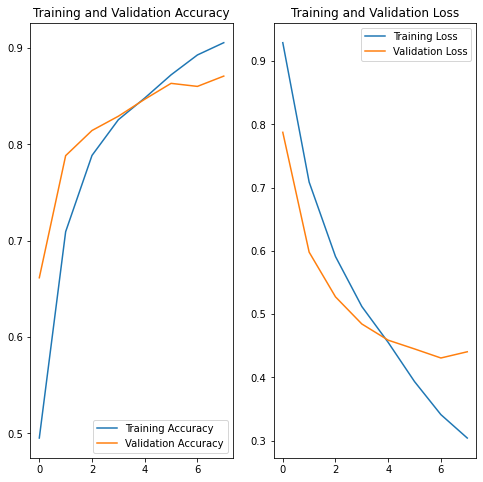

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()